# Day 32: API Hands-On & Request Fundamentals

**Session Context:**

- Last 3 days: Day 29-A, Day 30-A, Day 31-B
- Previous day energy: Normal
- Cumulative training day: 32

**Type:** A (70-20-10)
**Focus:** Translate yesterday's concepts (HTTP/JSON) into actual Python code using the `requests` library.

## FOUNDATION DRILLING (MANDATORY)

**Part 1a - Fluency Rep:**

Choose ONE (2-3 min):

1. **Pandas groupby:** You have `sales` DataFrame with columns `region` and `revenue`. Write code that returns the average revenue for each region.
2. **List comprehension:** You have `temps = [32, 68, 75, 29, 85, 41]`. Write code that creates a new list containing only temps above 50, each converted to Celsius using `(temp - 32) * 5/9`.

In [1]:
# 1. df.groupby('region')['revenue'].mean()

temps = [32, 68, 75, 29, 85, 41]

high_temp_in_cels = [round((temp - 32) * 5/9, 2) for temp in temps if temp > 50]
print(high_temp_in_cels)

[20.0, 23.89, 29.44]


**Part 1b - enumerate() Drilling (Day 1 of 3):**

In [2]:
# Basic pattern
# for index, item in enumerate(iterable):
#     do_something(index, item)

# Real example
# fruits = ['apple', 'banana', 'cherry']
# for i, fruit in enumerate(fruits):
#     print(f"{i}: {fruit}")
# Output: 0: apple, 1: banana, 2: cherry
# Translation: "Loop through list, get both position AND value at each step"

# With start parameter
# for i, fruit in enumerate(fruits, start=1):
#     print(f"{i}. {fruit}")
# Output: 1. apple, 2. banana, 3. cherry
# Translation: "Same thing, but count from 1 instead of 0"

**Task: You have tasks = ['Clean data', 'Train model', 'Deploy']. Write code that prints:**

Task 1: Clean data

Task 2: Train model

Task 3: Deploy

In [3]:
tasks = ['Clean data', 'Train model', 'Deploy']

for i, task in enumerate(tasks, start=1):
    print(f"Task{i}: {task}")

Task1: Clean data
Task2: Train model
Task3: Deploy


**Part 2 - Day 31 API Concepts Rep:**

Answer from memory (no looking up):

1. **What HTTP method fetches data without changing anything on the server?** GET

2. **What does status code 200 mean? What about 404?** 200 = OK; 404 = Page Not Found

3. **When you call `response.json()`, what Python data type do you get back?** dict

**Part 3a - Viz Micro-Drill**

Task: From memory, write the code to create a histogram with:

Data: ages = [23, 45, 12, 67, 34, 89, 23, 45, 67, 23]
Title: "Age Distribution"
X-axis label: "Age"
Y-axis label: "Frequency"

Use matplotlib. Write it from memory, then run it to verify it works.

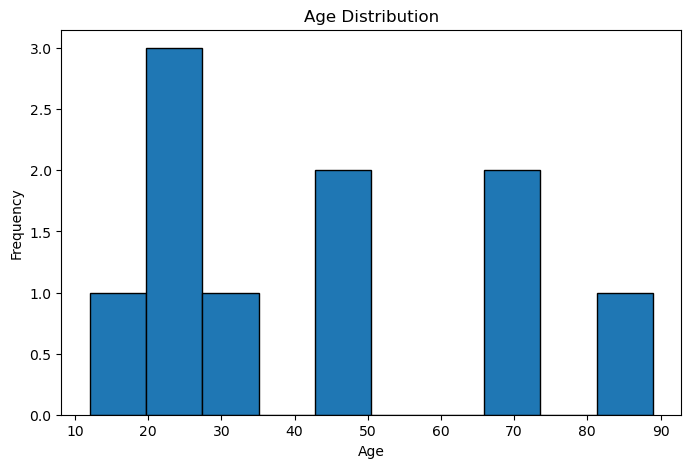

In [4]:
import matplotlib.pyplot as plt

ages = [23, 45, 12, 67, 34, 89, 23, 45, 67, 23]

plt.figure(figsize=(8,5))
plt.hist(ages, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

**Part 3b - SQL Micro-Drill:**

You have a `users` table. The `email` column allows NULLs.

- Query A: `SELECT COUNT(*) FROM users;`
- Query B: `SELECT COUNT(email) FROM users;`

**What's the difference in results? Why?**
- Query A will return the full value count of every column, including nulls
- Query B will return the email count, excluding nulls

**The WHY Behind COUNT Behavior**

**COUNT(*) mechanism:**

- Counts rows in the table
- Doesn't look at any specific column values
- Every row exists, so every row gets counted
- NULL values in any column don't matter

**COUNT(column_name) mechanism:**

- Counts non-NULL values in that specific column
- Evaluates each row: "Does this column have a value?"
- If NULL → skip this row
- If has value → count it

**Why the difference exists:**
SQL needs a way to count "how many records exist" (COUNT(*)) separate from "how many records have data in this field" (COUNT(column)).

*Real-world example:*
You have 1000 users in your database. 800 provided an email, 200 left it blank (NULL).

- COUNT(*) → 1000 (how many user records)
- COUNT(email) → 800 (how many users have emails)
- Difference → 200 (users with missing emails)

*API connection:* When you fetch user data from an API, some users might not have a phone field. If you count records vs count phones, you find gaps in your data - same principle.

## Block 1: The Request Lifecycle

**Goal:** Send your first programmatic HTTP request and inspect the response object.

**Concept:** When you run `requests.get()`, Python doesn't just get the data. It gets a Response Object containing the payload AND metadata (status codes, headers).

**Task 1: Make the connection**

1. Import `requests`
2. Define `url = "<https://jsonplaceholder.typicode.com/todos/1>"`
3. Create `response = requests.get(url)`
4. Print `type(response)`

**Task 2: Inspect the envelope**

Print these three attributes:

1. `response.status_code`
2. `response.ok`
3. `response.headers`

**Checkpoint:** What status code did you get?

**Task 3: Raw vs. parsed**

1. Print `response.text` — observe this is a string
2. Create `data = response.json()`
3. Print `type(data)` — should now be `dict`

**Checkpoint:** What changed between `.text` and `.json()`?

In [5]:
# Task 1:

import requests

url = "https://jsonplaceholder.typicode.com/todos/1"
response = requests.get(url)
print(type(response))

<class 'requests.models.Response'>


In [6]:
# Task 2:

print(response.status_code)
print(response.ok)
print(response.headers)

200
True
{'Date': 'Wed, 14 Jan 2026 00:57:58 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'access-control-allow-credentials': 'true', 'Cache-Control': 'max-age=43200', 'etag': 'W/"53-hfEnumeNh6YirfjyjaujcOPPT+s"', 'expires': '-1', 'nel': '{"report_to":"heroku-nel","response_headers":["Via"],"max_age":3600,"success_fraction":0.01,"failure_fraction":0.1}', 'pragma': 'no-cache', 'report-to': '{"group":"heroku-nel","endpoints":[{"url":"https://nel.heroku.com/reports?s=AgYWaJQrSS7comcx0Y0vHdzh%2BMh7FFcFty3Hq647VVI%3D\\u0026sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d\\u0026ts=1758289680"}],"max_age":3600}', 'reporting-endpoints': 'heroku-nel="https://nel.heroku.com/reports?s=AgYWaJQrSS7comcx0Y0vHdzh%2BMh7FFcFty3Hq647VVI%3D&sid=e11707d5-02a7-43ef-b45e-2cf4d2036f7d&ts=1758289680"', 'Server': 'cloudflare', 'vary': 'Origin, Accept-Encoding', 'via': '2.0 heroku-router', 'x-content-type-options': 'nosniff', 'x-powered-by': 'Expre

In [7]:
# Task 3:

print(response.text)
print(type(response.text))
print("---")
data = response.json()
print(type(data))

{
  "userId": 1,
  "id": 1,
  "title": "delectus aut autem",
  "completed": false
}
<class 'str'>
---
<class 'dict'>


In [8]:
# Look carefully at what these return

print("=== Using print() ===")
print(response.text)
print(type(response.text))

print("\n=== Using repr() ===")
print(repr(response.text))  # repr() shows the ACTUAL string with quotes

print("\n=== After .json() ===")
data = response.json()
print(data)
print(type(data))

=== Using print() ===
{
  "userId": 1,
  "id": 1,
  "title": "delectus aut autem",
  "completed": false
}
<class 'str'>

=== Using repr() ===
'{\n  "userId": 1,\n  "id": 1,\n  "title": "delectus aut autem",\n  "completed": false\n}'

=== After .json() ===
{'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}
<class 'dict'>


## Block 2: Safe Data Extraction with .get()

**Goal:** Extract data from API responses without crashing on missing keys.

**Conceptual Anchor — Why .get() matters:**

In [9]:
# Dangerous - crashes if key missing
# user = {'name': 'Alice'}
# age = user['age']  # KeyError!

# Safe - returns default if missing
# age = user.get('age', 'Unknown')  # Returns 'Unknown'


APIs change. Keys go missing. `.get()` prevents crashes.

**New Pattern:**

In [10]:
# Basic pattern
# dict.get(key, default_value)

# Real example
# todo = {'userId': 1, 'title': 'Buy groceries', 'completed': False}
# priority = todo.get('priority', 'normal')
# Translation: "Get 'priority' if it exists, otherwise return 'normal'"

# Nested access pattern
# data = {'user': {'profile': {'name': 'Alice'}}}
# name = data.get('user', {}).get('profile', {}).get('name', 'Unknown')
# Translation: "Drill down safely — if any level missing, return empty dict, continue chain"

# Common variations
# profile = data.get('profile', {})  # Empty dict default for chaining
# value = data.get('key')  # Returns None if missing (no default specified)


**Task 1: Basic extraction**

Using your `data` dict from Block 1:

1. Extract and print the `'title'` value
2. Extract and print the `'completed'` value

**Task 2: Handle missing keys**

1. Try `data['author']` — observe the error
2. Fix it using `.get()` with a default value

**Checkpoint:** Paste your `.get()` code.

In [11]:
# Task 1:

print(data['title'])
print(data['completed'])

delectus aut autem
False


In [12]:
# Task 2a:

# print(data['author'])

In [13]:
# Task 2b:

print(data.get('author', 'Unknown'))

Unknown


## Block 3: Working with Nested Data

**Goal:** Extract data from complex, nested API responses.

**Setup:**

In [14]:
response = requests.get("https://jsonplaceholder.typicode.com/users/1")
user = response.json()

**Task 1: Explore the structure**

Print `user` and observe what's nested inside. Identify:

- Where is the street address?
- Where is the company name?

In [15]:
print(user)

{'id': 1, 'name': 'Leanne Graham', 'username': 'Bret', 'email': 'Sincere@april.biz', 'address': {'street': 'Kulas Light', 'suite': 'Apt. 556', 'city': 'Gwenborough', 'zipcode': '92998-3874', 'geo': {'lat': '-37.3159', 'lng': '81.1496'}}, 'phone': '1-770-736-8031 x56442', 'website': 'hildegard.org', 'company': {'name': 'Romaguera-Crona', 'catchPhrase': 'Multi-layered client-server neural-net', 'bs': 'harness real-time e-markets'}}


**Task 2: Extract nested values**

Using `.get()` and chaining, extract and print:

1. The user's name
2. The user's city (inside `address`)
3. The user's company name (inside `company`)
4. The user's `department` (doesn't exist — use default)

In [16]:
print(user.get('name'))
print(user.get('address', {}).get('city', 'Unknown'))
print(user.get('company', {}).get('name', 'Unknown'))
print(user.get('department', 'Unknown'))

Leanne Graham
Gwenborough
Romaguera-Crona
Unknown


**Task 3: Combine enumerate() and .get()**

In [17]:
response = requests.get("https://jsonplaceholder.typicode.com/users")
users = response.json()

# Checkpoint: What is type(users)? What is len(users)?
print(type(users))
print(len(users))

### The Task

# Write code that prints a **numbered list** of all users showing **name** and **city**:
# 1. Leanne Graham - Gwenborough
# 2. Ervin Howell - Wisokyburgh
# 3. ...

<class 'list'>
10


In [18]:
# Pattern: enumerate() + List of Dicts + Nested Access

# Basic pattern
# for index, item in enumerate(list_of_dicts, start=1):
#     value = item.get('key', {}).get('nested_key', 'default')
#     print(f"{index}. {value}")

# Real example with your data

for i, user in enumerate(users, start=1):
    name = user.get('name', 'Unknown')
    city = user.get('address', {}).get('city', 'Unknown')
    print(f"{i}. {name} - {city}")

# Translation: "Loop through list, get position number AND dict at each step,
#              extract values from that dict (safely), print formatted"

# Common variations
# Just enumerate without nested access

print('='*20)

for i, user in enumerate(users, start=1):
    print(f"{i}. {user.get('name')}")

# Extract multiple nested values

print('='*20)

for i, user in enumerate(users, start=1):
    name = user.get('name', 'Unknown')
    street = user.get('address', {}).get('street', 'Unknown')
    company = user.get('company', {}).get('name', 'Unknown')
    print(f"{i}. {name} works at {company} on {street}")

1. Leanne Graham - Gwenborough
2. Ervin Howell - Wisokyburgh
3. Clementine Bauch - McKenziehaven
4. Patricia Lebsack - South Elvis
5. Chelsey Dietrich - Roscoeview
6. Mrs. Dennis Schulist - South Christy
7. Kurtis Weissnat - Howemouth
8. Nicholas Runolfsdottir V - Aliyaview
9. Glenna Reichert - Bartholomebury
10. Clementina DuBuque - Lebsackbury
1. Leanne Graham
2. Ervin Howell
3. Clementine Bauch
4. Patricia Lebsack
5. Chelsey Dietrich
6. Mrs. Dennis Schulist
7. Kurtis Weissnat
8. Nicholas Runolfsdottir V
9. Glenna Reichert
10. Clementina DuBuque
1. Leanne Graham works at Romaguera-Crona on Kulas Light
2. Ervin Howell works at Deckow-Crist on Victor Plains
3. Clementine Bauch works at Romaguera-Jacobson on Douglas Extension
4. Patricia Lebsack works at Robel-Corkery on Hoeger Mall
5. Chelsey Dietrich works at Keebler LLC on Skiles Walks
6. Mrs. Dennis Schulist works at Considine-Lockman on Norberto Crossing
7. Kurtis Weissnat works at Johns Group on Rex Trail
8. Nicholas Runolfsdottir

## End of Day: Reflection

1. **Why `.json()`?** Why can't we just use `response.text` directly as a dictionary?

response.text is a string containing JSON-formatted text (e.g., '{"name": "Alice"}'). You can't use bracket notation or .get() on strings.
.json() parses that string and converts it into Python objects (dict/list) that you can manipulate programmatically.

Data transformation pipeline:
Server sends → raw bytes over network
.text → decoded string '{"userId": 1}'
.json() → Python dict {'userId': 1}

2. **Safe access:** What problem does the chained `.get()` pattern (`data.get('a', {}).get('b')`) solve?

Chained .get() with {} defaults prevents crashes when navigating nested dictionaries with potentially missing keys.

The problem it solves:
Without safe chaining - crashes if 'address' missing
city = user['address']['city']  # KeyError if 'address' doesn't exist

Without {} default - crashes if 'address' missing
city = user.get('address').get('city')  # AttributeError: 'NoneType' has no attribute 'get'

Safe chaining - returns default if ANY level missing
city = user.get('address', {}).get('city', 'Unknown')
The {} default ensures that if a key is missing, you get an empty dict instead of None, so the next .get() can still run without crashing.

3. **enumerate() check:** Can you write the enumerate pattern from memory now?

   Yes

4. **Connection:** You build an app that fetches property data from an API. The API sometimes returns listings without a `price` field. How does today's learning help you handle that?

Use .get() with a meaningful default value to handle inconsistent API data:
Fetch property listings
response = requests.get("https://api.realestate.com/listings")
listings = response.json()

for listing in listings:
    price = listing.get('price', 'Call for pricing')
    sqft = listing.get('sqft', 'Not available')
    beds = listing.get('bedrooms', 0)
    
    print(f"${price} - {beds} bed, {sqft} sqft")

What this solves:
App doesn't crash when some listings lack price data
Users still see the listing with "Call for pricing" instead of blank/error
You can filter out or flag incomplete listings: if listing.get('price') is None:

Business benefit: Graceful degradation. Better to show partial data than crash the entire app. In real estate APIs, not all properties have every field (new construction may lack sqft, luxury properties may hide price, etc.). Safe extraction keeps your app running.